<a href="https://colab.research.google.com/github/hitesha14/Rising2021_Timeseries/blob/main/TimeSynth_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/TimeSynth/TimeSynth.git

  Cloning https://github.com/TimeSynth/TimeSynth.git to /tmp/pip-req-build-mfypndet
  Running command git clone -q https://github.com/TimeSynth/TimeSynth.git /tmp/pip-req-build-mfypndet
     |████████████████████████████████| 12.8MB 327kB/s 
     |████████████████████████████████| 143kB 33.6MB/s 
  Created wheel for timesynth: filename=timesynth-0.2.4-cp36-none-any.whl size=15429 sha256=8f5b13022fae04d5bd6c22c830f4f08d09ecb1f35a0a2a9a3b8f3e565356042c
  Stored in directory: /tmp/pip-ephem-wheel-cache-q0b568rw/wheels/00/d5/b7/7f6f768fc3457c8292ae5a0856c51089efa4409ec2811fbcdd
  Created wheel for jitcdde: filename=jitcdde-1.4.0-cp36-none-any.whl size=30662 sha256=fda20f7b15b0996fc8c9beafcafbca182dab3439f2296a239f043013212b21c5
  Stored in directory: /root/.cache/pip/wheels/2c/14/0b/e7afe0b0f1dfd5327ad49307b98670c38a7df3bc4872d69178
  Created wheel for jitcxde-common: filename=jitcxde_common-1.4.1-cp36-none-any.whl size=14946 sha256=2d20585dfa5c5ed02265806719aea1e582c3ea33932cfb21092afc63b

In [ ]:
import timesynth as ts

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

**Harmonic signal generation**

In [ ]:
# Initializing TimeSampler
time_sampler = ts.TimeSampler(stop_time=20)

In [ ]:
# Sampling irregular time samples
irregular_time_samples = time_sampler.sample_irregular_time(num_points=500, keep_percentage=50)

In [ ]:
# Initializing Sinusoidal signal
sinusoid = ts.signals.Sinusoidal(frequency=0.25)

In [ ]:
# Initializing Gaussian noise
white_noise = ts.noise.GaussianNoise(std=0.3)

In [ ]:
# Initializing TimeSeries class with the signal and noise objects
timeseries = ts.TimeSeries(signal_generator=sinusoid, noise_generator=white_noise)

In [ ]:
# Sampling using the irregular time samples
samples, signals, errors = timeseries.sample(irregular_time_samples)

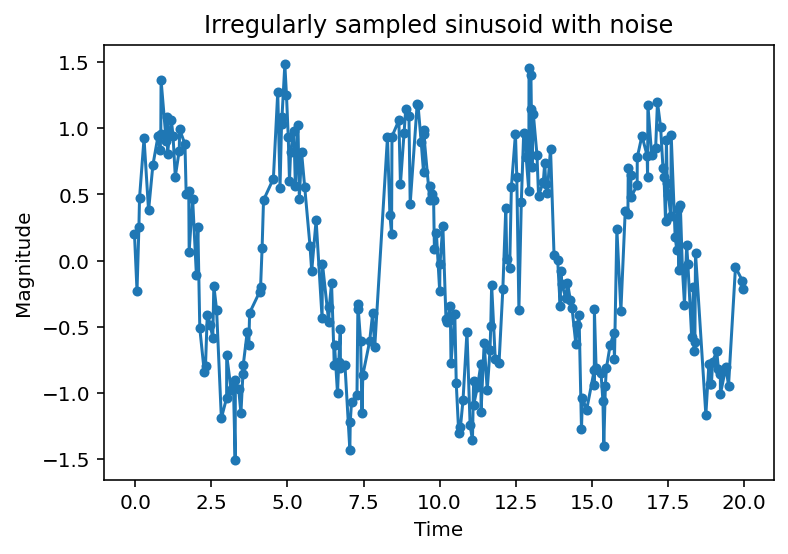

In [ ]:
# Plotting the series
plt.plot(irregular_time_samples, samples, marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Irregularly sampled sinusoid with noise');

**Harmonic signals with red noise**

In [ ]:
# Initializing Gaussian noise
red_noise = ts.noise.RedNoise(std=0.5, tau=0.8)

In [ ]:
# Initializing TimeSeries class with the signal and noise objects
timeseries_corr = ts.TimeSeries(sinusoid, noise_generator=red_noise)

In [ ]:
# Sampling using the irregular time samples
samples_corr, signals_corr, errors_corr = timeseries_corr.sample(irregular_time_samples)

Text(0.5, 1.0, 'Irregularly sampled sinusoid with red noise')

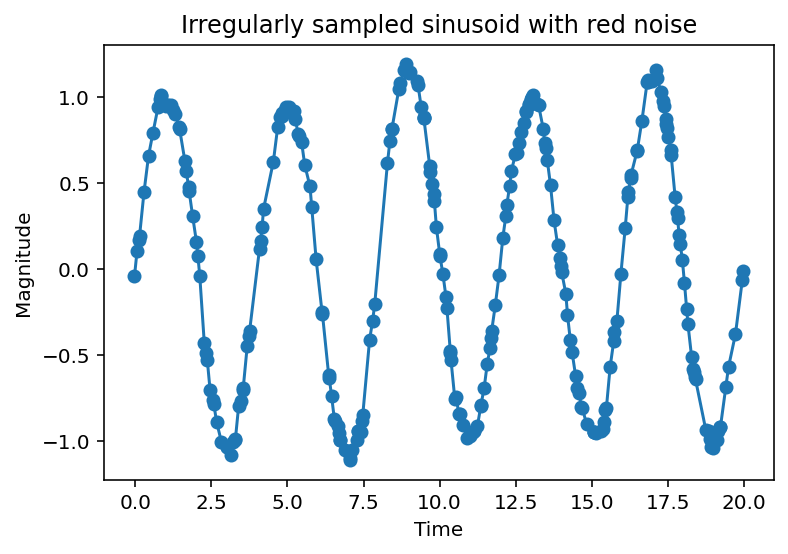

In [ ]:
# Plotting the series
plt.plot(irregular_time_samples, samples_corr, marker='o')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Irregularly sampled sinusoid with red noise')

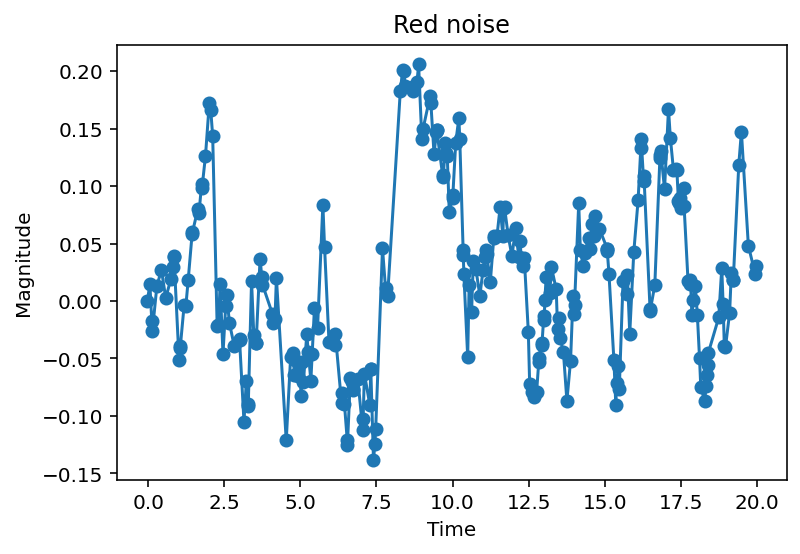

In [ ]:
plt.plot(irregular_time_samples, errors_corr, marker='o')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Red noise');

**Pseudoperiodic signal**

In [ ]:
# Initializing TimeSampler
time_sampler_pp = ts.TimeSampler(stop_time=20)

In [ ]:
# Sampling irregular time samples
irregular_time_samples_pp = time_sampler_pp.sample_irregular_time(resolution=0.05, keep_percentage=50)

In [ ]:
# Initializing Pseudoperiodic signal
pseudo_periodic = ts.signals.PseudoPeriodic(frequency=2, freqSD=0.01, ampSD=0.5)

In [ ]:
# Initializing TimeSeries class with the pseudoperiodic signal
timeseries_pp = ts.TimeSeries(pseudo_periodic)

In [ ]:
# Sampling using the irregular time samples
samples_pp, signals_pp, errors_pp = timeseries_pp.sample(irregular_time_samples_pp)

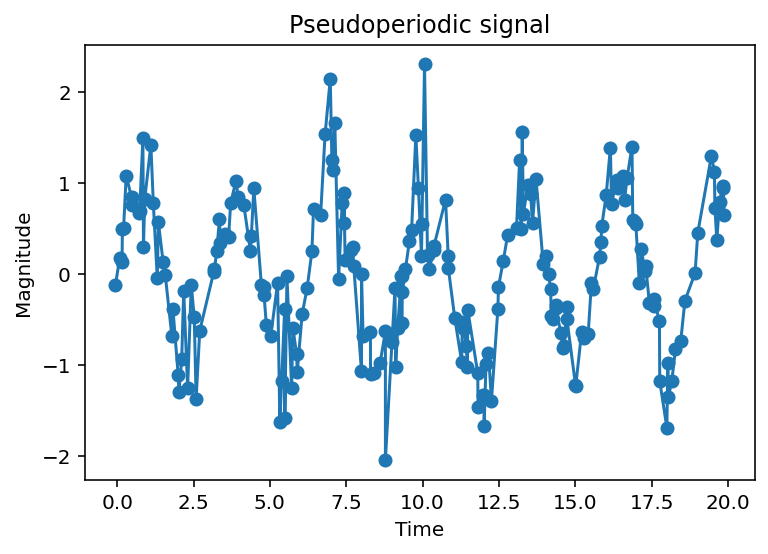

In [ ]:
# Plotting the series
plt.plot(irregular_time_samples_pp, samples_pp, marker='o')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Pseudoperiodic signal');

**Gaussian process signal generation**

In [ ]:
gp = ts.signals.GaussianProcess(kernel='Matern', nu=3./2)

In [ ]:
gp_series = ts.TimeSeries(signal_generator=gp)

In [ ]:
samples = gp_series.sample(irregular_time_samples)[0]

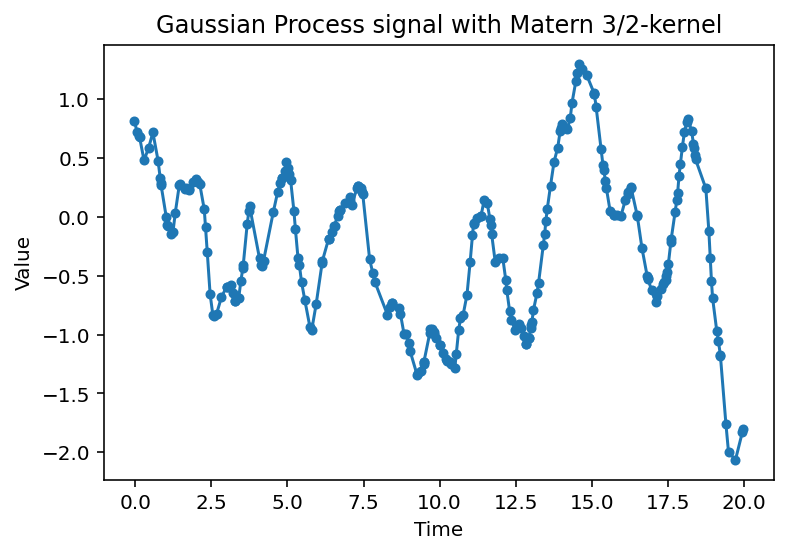

In [ ]:
plt.plot(irregular_time_samples, samples, marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Gaussian Process signal with Matern 3/2-kernel');

**CAR model**

In [ ]:
car = ts.signals.CAR(ar_param=0.9, sigma=0.01)

In [ ]:
car_series = ts.TimeSeries(signal_generator=car)

In [ ]:
samples = car_series.sample(irregular_time_samples)

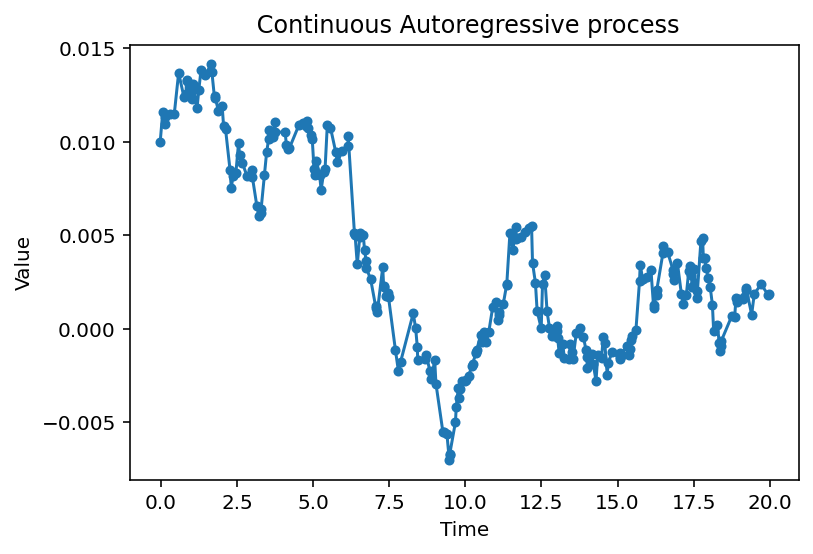

In [ ]:
plt.plot(irregular_time_samples, samples[0], marker='o', markersize=4)
plt.xlabel('Time')  #X-axis label
plt.ylabel('Value')  #Y-axis label
plt.title(' Continuous Autoregressive process');  #title of the plot


**AR model for regularly sampled timestamps**

In [ ]:
# Initializing TimeSampler
time_sampler = ts.TimeSampler(stop_time=20)

In [ ]:
# Sampling regular time samples
regular_time_samples = time_sampler.sample_regular_time(num_points=500)

In [ ]:
# Initializing AR(2) model
ar_p = ts.signals.AutoRegressive(ar_param=[1.5, -0.75])

In [ ]:
ar_p_series = ts.TimeSeries(signal_generator=ar_p)

In [ ]:
samples = ar_p_series.sample(regular_time_samples)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


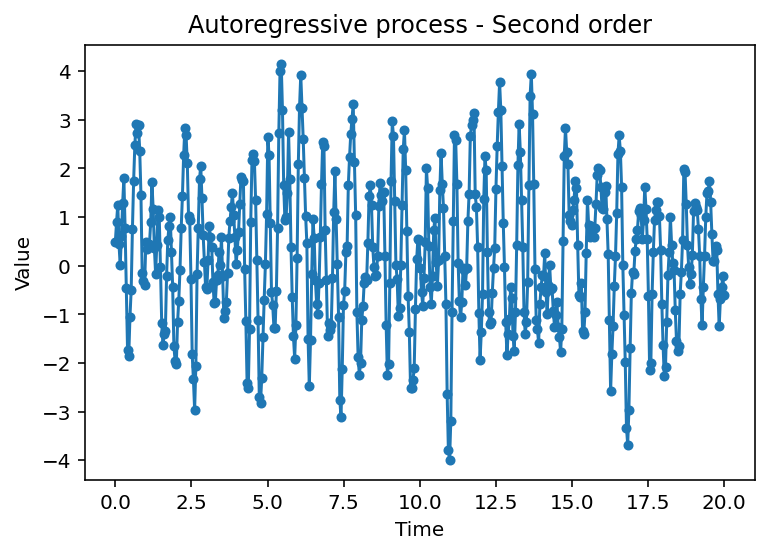

In [ ]:
plt.plot(regular_time_samples, samples[0], marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Autoregressive process - Second order');

**Mackey-Glass signal**

In [ ]:
# Initializing TimeSampler
time_sampler = ts.TimeSampler(stop_time=1500)

In [ ]:
# Sampling irregular time samples
irregular_time_samples = time_sampler.sample_irregular_time(num_points=1500, keep_percentage=75)

In [ ]:
mg = ts.signals.MackeyGlass()
noise = ts.noise.GaussianNoise(std=0.1)
mg_series = ts.TimeSeries(signal_generator=mg, noise_generator=noise)
mg_samples, mg_signals, mg_errors = mg_series.sample(irregular_time_samples)

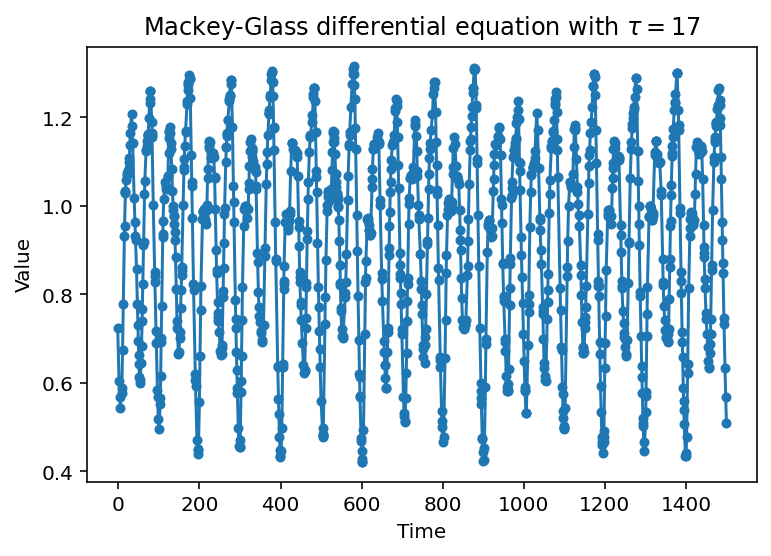

In [ ]:
plt.plot(irregular_time_samples, mg_signals, marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Mackey-Glass differential equation with $\\tau=17$');


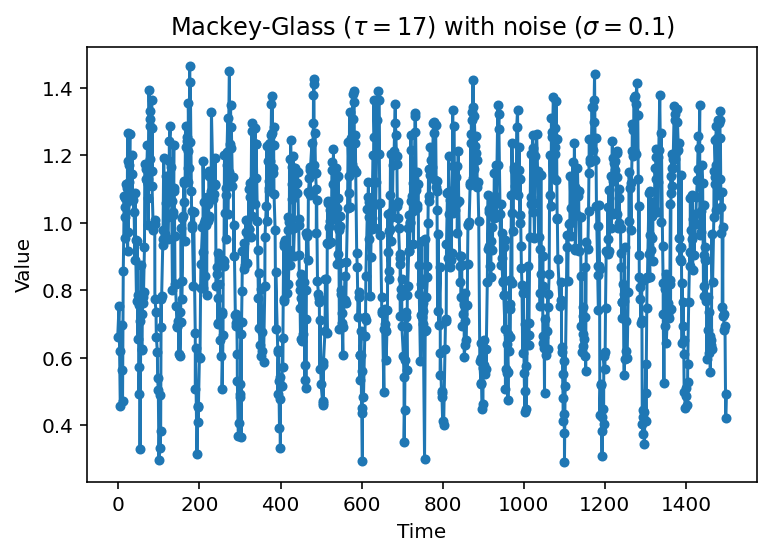

In [ ]:
plt.plot(irregular_time_samples, mg_samples, marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Mackey-Glass ($\\tau=17$) with noise ($\\sigma = 0.1$)');

**NARMA series**

In [ ]:
# Initializing TimeSampler
time_sampler = ts.TimeSampler(stop_time=500)


In [ ]:
# Sampling irregular time samples
times = time_sampler.sample_regular_time(resolution=1.)


In [ ]:
# Take Samples
narma_signal = ts.signals.NARMA(order=10)
series = ts.TimeSeries(narma_signal)
samples, _, _ = series.sample(times)


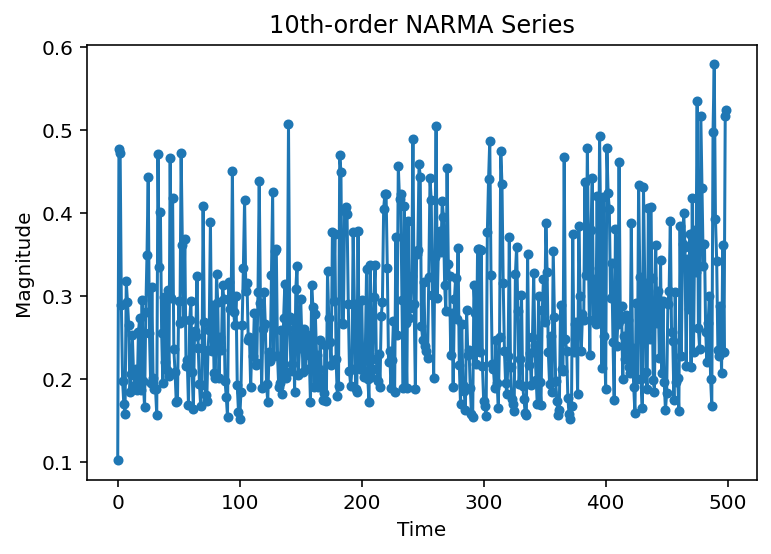

In [ ]:
# Plotting the series
plt.plot(times, samples, marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('10th-order NARMA Series');